In [14]:
import os
import json
import collections
import random
import numpy as np
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

### Figures

In [15]:
DATA_DIR = "/shared/sets/datasets/vision/artificial_shapes"

In [16]:
specific_data_dir_suffix = "dependencies/dependenciesDEF_size64_len128_cbF_cfT_noF"
specific_data_dir = os.path.join(DATA_DIR, specific_data_dir_suffix)

In [17]:
# variant
size = 64
simplicity = 3
N = 200
# figures
no_overlap = False
simpler = True
# colours
coloured_background = False
coloured_figues = True

In [18]:
def get_appendix(coloured_background, coloured_figues, no_overlap):
    def get_bool_str(v):
        return "T" if v else "F"
    return f"cb{get_bool_str(coloured_background)}_cf{get_bool_str(coloured_figues)}_no{get_bool_str(no_overlap)}"

In [33]:
appendix = get_appendix(coloured_background, coloured_figues, no_overlap)
specific_data_dir = os.path.join(DATA_DIR, "dependencies/dependenciesOOD_size64_len7500_cbF_cfT_noF")

In [34]:
grid_n_imgs = 8

In [35]:
with open(os.path.join(specific_data_dir, 'data.txt'), 'r') as f:
    data = [json.loads(line) for line in f]

In [36]:
def load_label(label_file):
    rid2name = list()   # rid: real id, same as the id in label.txt
    id2rid = list()     # id: number from 0 to len(rids)-1 corresponding to the order of rids
    rid2id = list()     
    with open(label_file) as l:
        rid2name_dict = collections.defaultdict(str)
        id2rid_dict = collections.defaultdict(str)
        rid2id_dict = collections.defaultdict(str)
        new_id = 0 
        for line in l.readlines():
            line = line.strip('\n\r').split(';')
            if len(line) == 3: # attr description
                if len(rid2name_dict) != 0:
                    rid2name.append(rid2name_dict)
                    id2rid.append(id2rid_dict)
                    rid2id.append(rid2id_dict)
                    rid2name_dict = collections.defaultdict(str)
                    id2rid_dict = collections.defaultdict(str)
                    rid2id_dict = collections.defaultdict(str)
                    new_id = 0
                rid2name_dict["__name__"] = line[2]
                rid2name_dict["__attr_id__"] = line[1]
            elif len(line) == 2: # attr value description
                rid2name_dict[line[0]] = line[1]
                id2rid_dict[new_id] = line[0]
                rid2id_dict[line[0]] = new_id
                new_id += 1
        if len(rid2name_dict) != 0:
            rid2name.append(rid2name_dict)
            id2rid.append(id2rid_dict)
            rid2id.append(rid2id_dict)
    return rid2name, id2rid, rid2id

In [37]:
rid2name, id2rid, rid2id = load_label(os.path.join(specific_data_dir, 'label.txt'))

In [38]:
indices = random.sample(range(len(data)), grid_n_imgs**2)

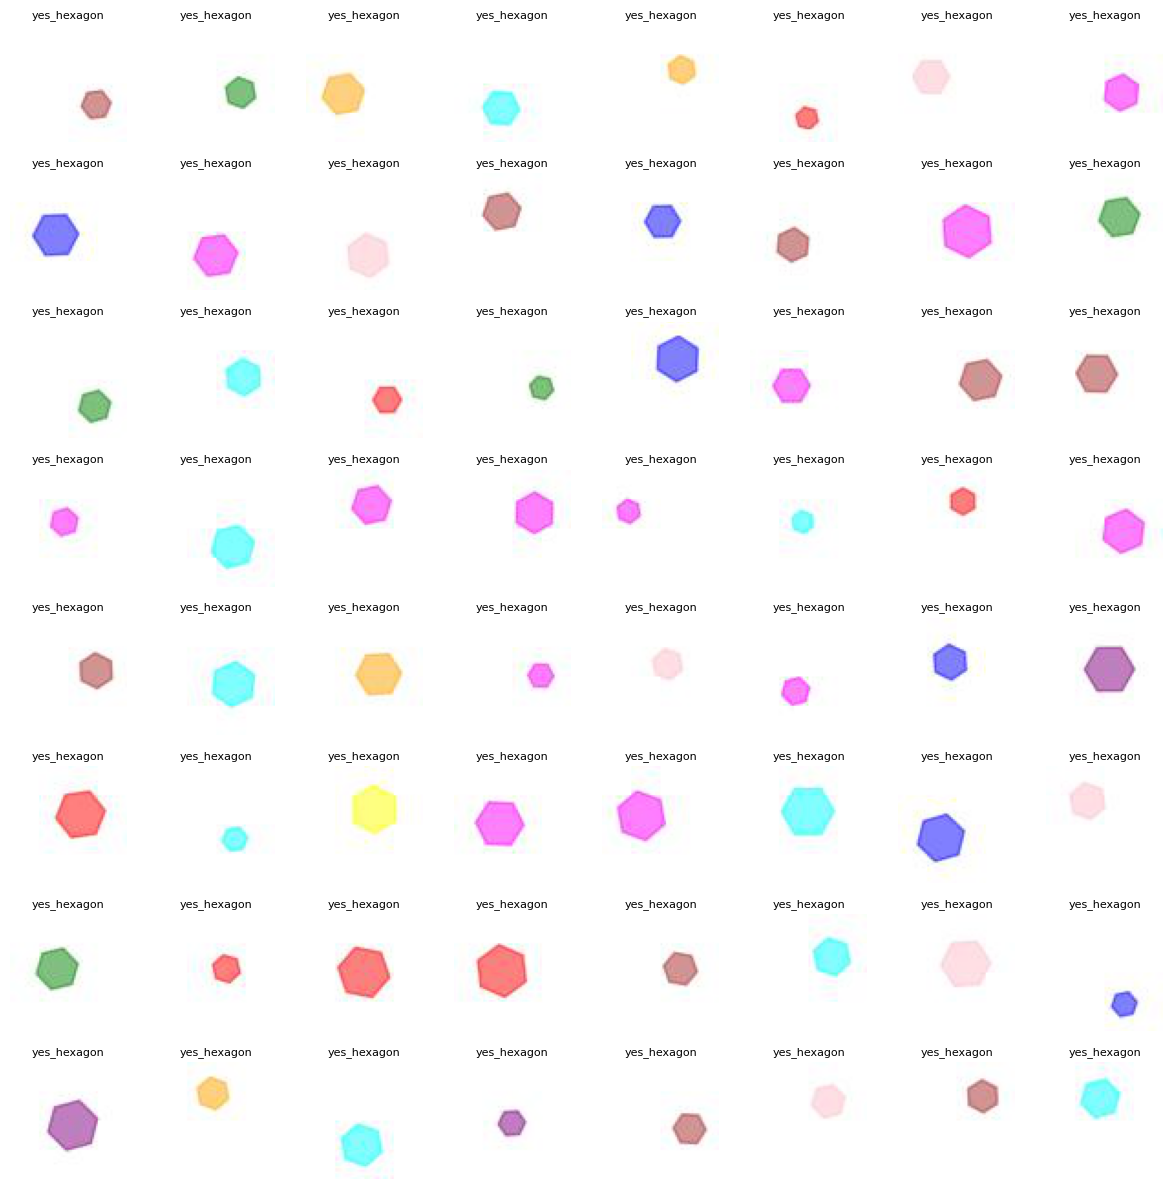

In [39]:
fig, axes = plt.subplots(grid_n_imgs, grid_n_imgs, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    index = indices[i]
    img_path = data[index]['image_file']
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

    label_ids = data[index]['id']
    label_descriptions = label_ids # TODO
    title = '\n'.join(label_descriptions)
    ax.set_title(title, fontsize=8)

plt.tight_layout()
plt.show()

### Synthetic